 # Attention and Self-Attention Project Analysis

 This notebook demonstrates:
 - Loading and inspecting translation data.
 - Visualizing basic statistics about the data.
 - Testing the Self-Attention mechanism with dummy input.
 - Analyzing the shapes of parameters and outputs.
 - Visualizing the attention weights.

In [1]:
# Import necessary libraries and modules.
import torch
import numpy as np
import matplotlib.pyplot as plt

# Import utility functions and the SelfAttention module.
from src.utils import load_translation_data, visualize_data
from src.self_attention import SelfAttention

## 1. Load and Inspect Translation Data

In [2]:
# Define the path to the data file.
data_file = '../data/rus.txt'

# Load English and Russian sentences from the data file.
eng_sentences, rus_sentences = load_translation_data(data_file)

# Print the total number of sentences loaded.
print(f"Number of English sentences: {len(eng_sentences)}")
print(f"Number of Russian sentences: {len(rus_sentences)}")

# Display the first 3 examples.
print("\nFirst 3 examples:")
for i in range(min(3, len(eng_sentences))):
    print(f"English: {eng_sentences[i]}  |  Russian: {rus_sentences[i]}")

Number of English sentences: 363386
Number of Russian sentences: 363386

First 3 examples:
English: Go.  |  Russian: Марш!
English: Go.  |  Russian: Иди.
English: Go.  |  Russian: Идите.


## 2. Visualize Data Properties

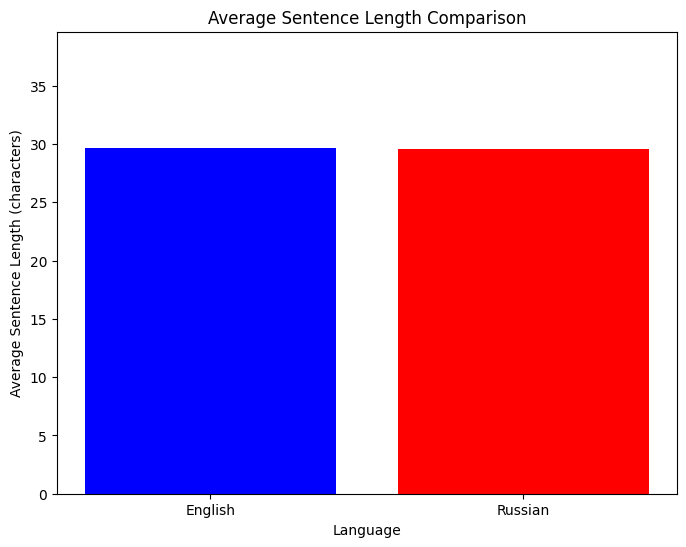

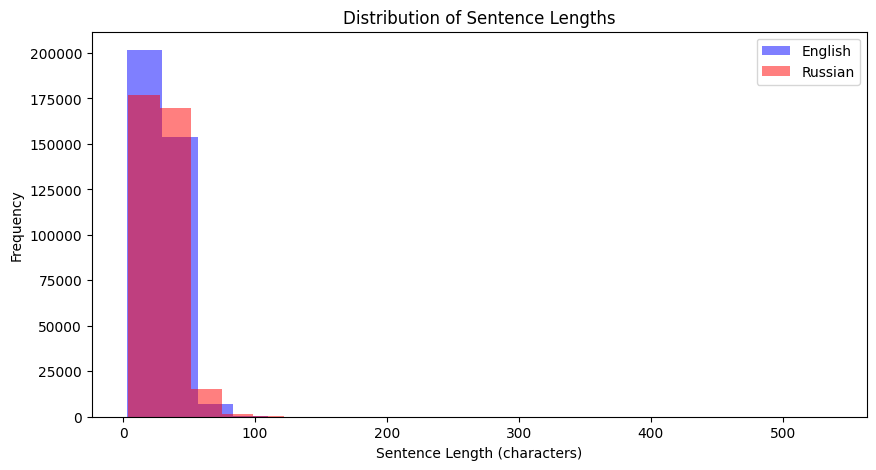

In [3]:
# Plot average sentence lengths and distribution histograms.
visualize_data(eng_sentences, rus_sentences)

## 3. Test the Self-Attention Mechanism

In [5]:
# Create dummy input data for testing self-attention.
# Assume: batch size = 2, sequence length = 10, embedding dimension = 64.
batch_size = 2
seq_length = 10
embed_dim = 64

# Generate a random tensor as dummy input.
dummy_input = torch.randn(batch_size, seq_length, embed_dim)

# Initialize the Self-Attention module.
self_attn = SelfAttention(embed_dim)

# Print the shape of the dummy input.
print(f"Dummy input shape: {dummy_input.shape}")

# Perform a forward pass through the self-attention module.
output, attn_weights = self_attn(dummy_input)

# Print shapes of the outputs.
print(f"Self-Attention output shape: {output.shape}")
print(f"Attention weights shape: {attn_weights.shape}")

Dummy input shape: torch.Size([2, 10, 64])
Self-Attention output shape: torch.Size([2, 10, 64])
Attention weights shape: torch.Size([2, 10, 10])


## 4. Visualize the Attention Weights

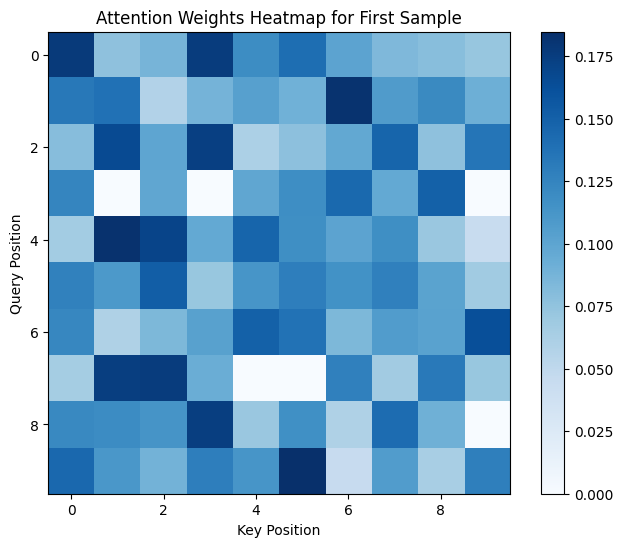

In [16]:
# For visualization, take the attention weights from the first sample in the batch.
sample_attn = attn_weights[0].detach().numpy()

# Plot the attention weights as a heatmap.
plt.figure(figsize=(8, 6))
plt.imshow(sample_attn, cmap='Blues')
plt.colorbar()
plt.title("Attention Weights Heatmap for First Sample")
plt.xlabel("Key Position")
plt.ylabel("Query Position")
plt.savefig("attention.png", dpi=300)
plt.show()

## 5. Additional Analysis: Attention Weight Statistics

In [7]:
# Calculate and print basic statistics for the attention weights.
mean_attn = np.mean(attn_weights.detach().numpy())
std_attn = np.std(attn_weights.detach().numpy())
print(f"Mean attention weight: {mean_attn:.4f}")
print(f"Std of attention weights: {std_attn:.4f}")

Mean attention weight: 0.1051
Std of attention weights: 0.0429
